## Stock Prediction using Numerical & Sentimental Analysis

**Name: SANTOSH KUMAR PAUL**

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import nltk  # importing natural language toolkit
import re  # re stands for regular expresssion which helps us to find particular string.
from nltk.corpus import stopwords  # Stopword removes all the unneccessary text values from the test dataset
nltk.download('stopwords')  # downloading the stopword 
nltk.download('vader_lexicon') # downloading the vader_lexicon 
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer   # Porter stemmer is used to get the stem word
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost 
import lightgbm 

[nltk_data] Downloading package stopwords to C:\Users\Santosh
[nltk_data]     Paul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Santosh
[nltk_data]     Paul\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
!pip install lightgbm

In [3]:
!pip install pmdarima

In [4]:
df_prices = pd.read_csv('TSLA.csv')

In [5]:
df_prices.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,5.788,5.900,5.530,5.616,5.616,4640500
1,04-01-2012,5.642,5.734,5.500,5.542,5.542,3150500
2,05-01-2012,5.552,5.586,5.370,5.424,5.424,5027500
3,06-01-2012,5.440,5.558,5.282,5.382,5.382,4931500
4,09-01-2012,5.400,5.498,5.224,5.450,5.450,4485000
5,10-01-2012,5.488,5.552,5.450,5.524,5.524,3359000
6,11-01-2012,5.524,5.676,5.460,5.646,5.646,3361500
7,12-01-2012,5.696,5.724,5.562,5.650,5.650,3646500
8,13-01-2012,5.680,5.700,4.528,4.558,4.558,27502000
9,17-01-2012,5.324,5.468,5.282,5.320,5.320,23258000


In [68]:
df_prices.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
2551,2022-02-22,834.130005,856.729980,801.099976,821.530029,821.530029,27762700
2552,2022-02-23,830.429993,835.299988,760.559998,764.039978,764.039978,31752300
2553,2022-02-24,700.390015,802.479980,700.000000,800.770020,800.770020,45107400
2554,2022-02-25,809.229980,819.500000,782.400024,809.869995,809.869995,25355900
2555,2022-02-28,815.010010,876.859985,814.710022,870.429993,870.429993,33002300


In [6]:
df_prices.size

17892

In [7]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2556 non-null   object 
 1   Open       2556 non-null   float64
 2   High       2556 non-null   float64
 3   Low        2556 non-null   float64
 4   Close      2556 non-null   float64
 5   Adj Close  2556 non-null   float64
 6   Volume     2556 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 139.9+ KB


# Data Preprocessing

In [8]:
#Converting Date column to datetime datatype
df_prices['Date'] = pd.to_datetime(df_prices['Date'])
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2556 non-null   datetime64[ns]
 1   Open       2556 non-null   float64       
 2   High       2556 non-null   float64       
 3   Low        2556 non-null   float64       
 4   Close      2556 non-null   float64       
 5   Adj Close  2556 non-null   float64       
 6   Volume     2556 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 139.9 KB


In [9]:
df_prices.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-03-01,5.788,5.900,5.530,5.616,5.616,4640500
1,2012-04-01,5.642,5.734,5.500,5.542,5.542,3150500
2,2012-05-01,5.552,5.586,5.370,5.424,5.424,5027500
3,2012-06-01,5.440,5.558,5.282,5.382,5.382,4931500
4,2012-09-01,5.400,5.498,5.224,5.450,5.450,4485000
5,2012-10-01,5.488,5.552,5.450,5.524,5.524,3359000
6,2012-11-01,5.524,5.676,5.460,5.646,5.646,3361500
7,2012-12-01,5.696,5.724,5.562,5.650,5.650,3646500
8,2012-01-13,5.680,5.700,4.528,4.558,4.558,27502000
9,2012-01-17,5.324,5.468,5.282,5.320,5.320,23258000


In [8]:
df_prices.dropna(inplace = True)

In [10]:
df_prices.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-03-01,5.788,5.900,5.530,5.616,5.616,4640500
1,2012-04-01,5.642,5.734,5.500,5.542,5.542,3150500
2,2012-05-01,5.552,5.586,5.370,5.424,5.424,5027500
3,2012-06-01,5.440,5.558,5.282,5.382,5.382,4931500
4,2012-09-01,5.400,5.498,5.224,5.450,5.450,4485000
5,2012-10-01,5.488,5.552,5.450,5.524,5.524,3359000
6,2012-11-01,5.524,5.676,5.460,5.646,5.646,3361500
7,2012-12-01,5.696,5.724,5.562,5.650,5.650,3646500
8,2012-01-13,5.680,5.700,4.528,4.558,4.558,27502000
9,2012-01-17,5.324,5.468,5.282,5.320,5.320,23258000


Text(0.5, 1.0, 'Stock Closing price fluctuation')

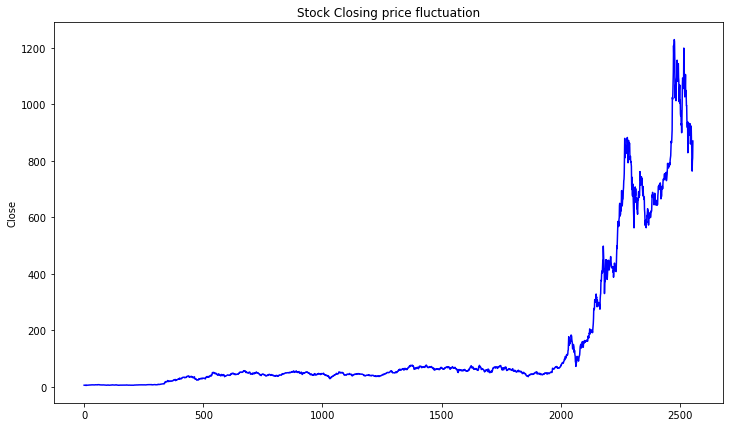

In [11]:
plt.figure(figsize=(12, 7))
df_prices['Close'].plot(color ="b")
plt.ylabel('Close')
plt.title("Stock Closing price fluctuation")

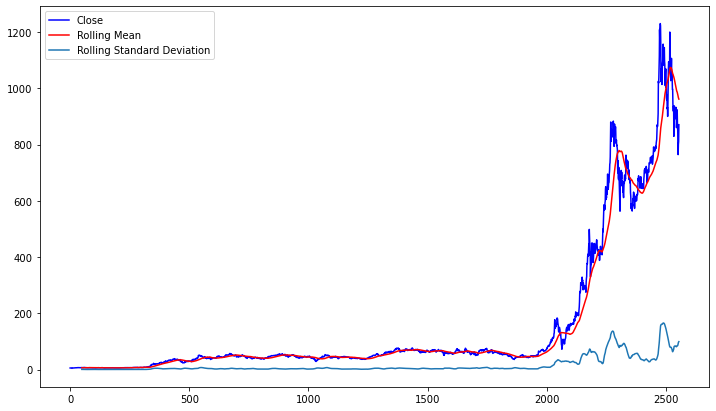

In [12]:
#Plotting moving average
close = df_prices['Close']
ma = close.rolling(window= 50).mean()
std = close.rolling(window=50).std()

plt.figure(figsize=(12, 7))
df_prices['Close'].plot(color = 'b', label = 'Close')
ma.plot(color = 'r', label = 'Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')
plt.legend()

Text(0.5, 1.0, 'Returns')

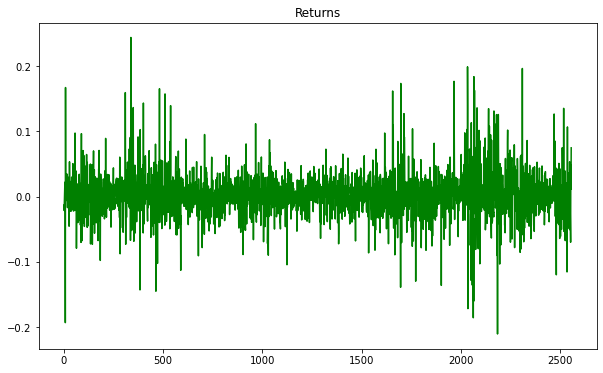

In [13]:
#Plotting returns
returns = close / close.shift(1) - 1

plt.figure(figsize = (10,6))
returns.plot(label='Return', color = 'g')
plt.title("Returns")

In [14]:
train = df_prices[:1000]
test = df_prices[1000:]

In [16]:
train.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-03-01,5.788,5.900,5.530,5.616,5.616,4640500
1,2012-04-01,5.642,5.734,5.500,5.542,5.542,3150500
2,2012-05-01,5.552,5.586,5.370,5.424,5.424,5027500
3,2012-06-01,5.440,5.558,5.282,5.382,5.382,4931500
4,2012-09-01,5.400,5.498,5.224,5.450,5.450,4485000
5,2012-10-01,5.488,5.552,5.450,5.524,5.524,3359000
6,2012-11-01,5.524,5.676,5.460,5.646,5.646,3361500
7,2012-12-01,5.696,5.724,5.562,5.650,5.650,3646500
8,2012-01-13,5.680,5.700,4.528,4.558,4.558,27502000
9,2012-01-17,5.324,5.468,5.282,5.320,5.320,23258000


In [17]:
test.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
1000,2015-12-23,46.436001,46.689999,45.625999,45.939999,45.939999,7775000
1001,2015-12-24,46.112000,46.375999,45.655998,46.113998,46.113998,3540000
1002,2015-12-28,46.298000,46.396000,45.108002,45.790001,45.790001,9506500
1003,2015-12-29,46.012001,47.543999,45.910000,47.438000,47.438000,12031500
1004,2015-12-30,47.320000,48.726002,47.133999,47.618000,47.618000,18489500
1005,2015-12-31,47.702000,48.689999,47.674000,48.001999,48.001999,13575000
1006,2016-04-01,46.144001,46.276001,43.799999,44.681999,44.681999,34135500
1007,2016-05-01,45.271999,45.377998,44.000000,44.686001,44.686001,15934000
1008,2016-06-01,44.000000,44.009998,43.195999,43.807999,43.807999,18895500
1009,2016-07-01,42.838001,43.688000,42.734001,43.130001,43.130001,17771500


In [18]:
test[["Date"]]

,Date
1000,2015-12-23
1001,2015-12-24
1002,2015-12-28
1003,2015-12-29
1004,2015-12-30
...,...
2551,2022-02-22
2552,2022-02-23
2553,2022-02-24
2554,2022-02-25


Basically stationarity means that a time series has a constant mean and constant variance over time.

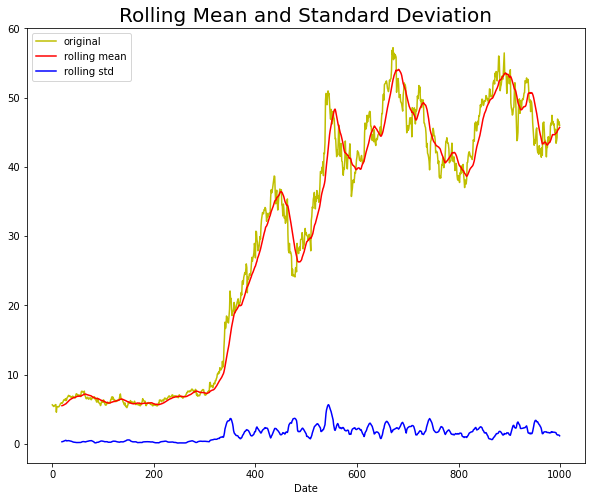

Results of dickey fuller test
ADF Test Statistic : -1.131065787728813
p-value : 0.7025256068061083
#Lags Used : 0
Number of Observations Used : 999
Weak evidence against null hypothesis, time series is non-stationary 


In [19]:
#Stationarity test
def test_stationarity(timeseries):

 #Determing rolling statistics
 rolmean = timeseries.rolling(20).mean()
 rolstd = timeseries.rolling(20).std()

 #Plot rolling statistics:
 plt.figure(figsize = (10,8))
 plt.plot(timeseries, color = 'y', label = 'original')
 plt.plot(rolmean, color = 'r', label = 'rolling mean')
 plt.plot(rolstd, color = 'b', label = 'rolling std')
 plt.xlabel('Date')
 plt.legend()
 plt.title('Rolling Mean and Standard Deviation',  fontsize = 20)
 plt.show(block = False)
 
 print('Results of dickey fuller test')
 result = adfuller(timeseries, autolag = 'AIC')
 labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
 for value,label in zip(result, labels):
   print(label+' : '+str(value) )
 if result[1] <= 0.05:
   print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
 else:
   print("Weak evidence against null hypothesis, time series is non-stationary ")
test_stationarity(train['Close'])  #plotting the original, rolling mean and rolling std of the training dataset with "close"
# attribute.

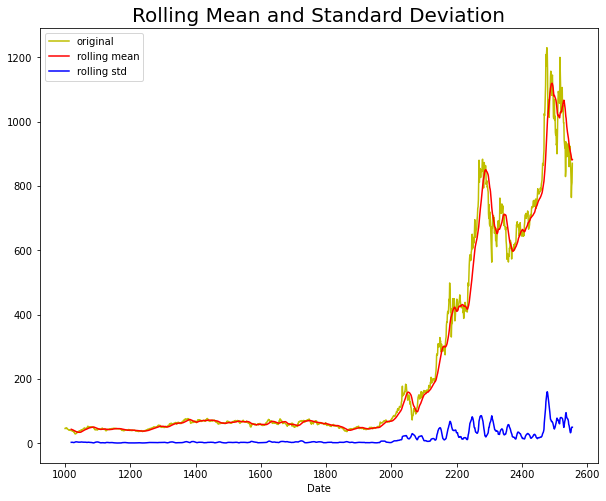

Results of dickey fuller test
ADF Test Statistic : -0.2439841057327465
p-value : 0.9330716982800162
#Lags Used : 24
Number of Observations Used : 1531
Weak evidence against null hypothesis, time series is non-stationary 


In [20]:
test_stationarity(test["Close"])

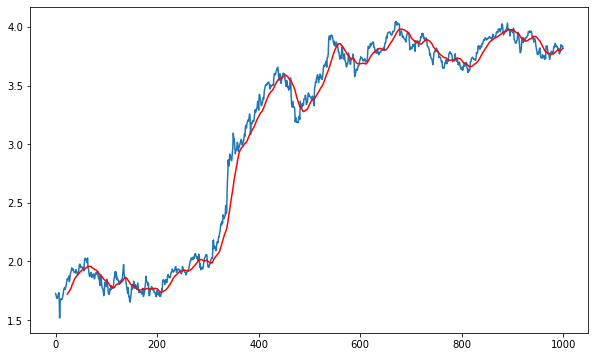

In [21]:
train_log = np.log(train['Close']) 
test_log = np.log(test['Close'])

mav = train_log.rolling(24).mean() # moving average mean - Rolling() function
plt.figure(figsize = (10,6))
plt.plot(train_log) 
plt.plot(mav, color = 'red') 

In [22]:
train['Close']

0       5.616000
1       5.542000
2       5.424000
3       5.382000
4       5.450000
         ...    
995    46.902000
996    46.678001
997    46.091999
998    46.512001
999    45.990002
Name: Close, Length: 1000, dtype: float64

In [23]:
train_log = np.log(train['Close']) 
train_log

0      1.725620
1      1.712355
2      1.690834
3      1.683060
4      1.695616
         ...   
995    3.848060
996    3.843273
997    3.830639
998    3.839710
999    3.828424
Name: Close, Length: 1000, dtype: float64

In [24]:
train_log.dropna(inplace = True)
test_log.dropna(inplace = True)



In [25]:
train_log.size

1000

In [26]:
test_log.size

1556

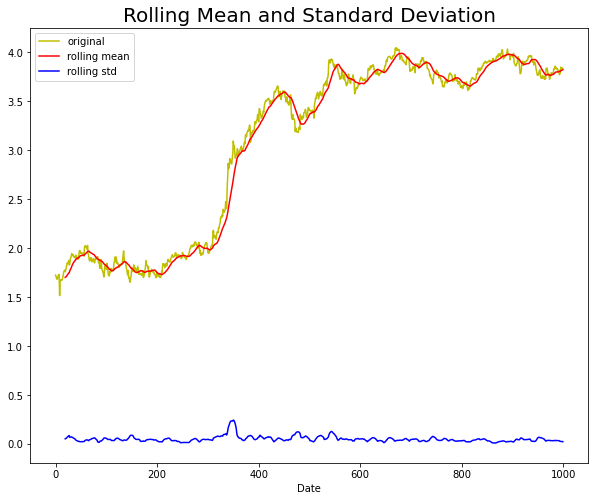

Results of dickey fuller test
ADF Test Statistic : -1.2776243748509908
p-value : 0.6393460137814411
#Lags Used : 0
Number of Observations Used : 999
Weak evidence against null hypothesis, time series is non-stationary 


In [27]:
test_stationarity(train_log)

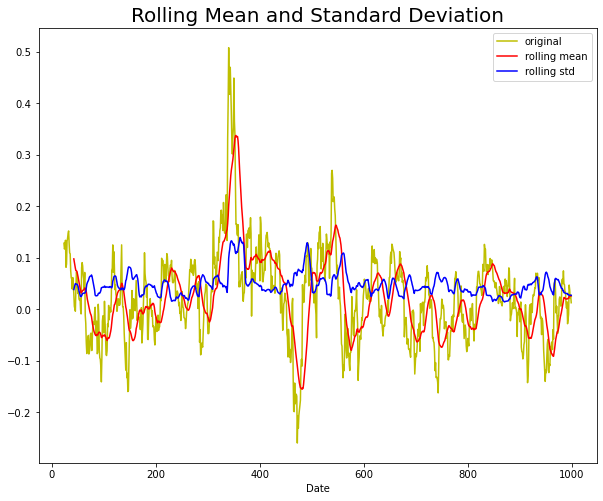

Results of dickey fuller test
ADF Test Statistic : -5.707589525285358
p-value : 7.426441194181218e-07
#Lags Used : 0
Number of Observations Used : 976
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [28]:
train_log_diff = train_log - mav
train_log_diff.dropna(inplace = True)

test_stationarity(train_log_diff)

In [29]:
#Using auto arima to make predictions using log data
from pmdarima import auto_arima
model = auto_arima(train_log, trace = True, error_action = 'ignore', suppress_warnings = True)
model.fit(train_log)
predictions = model.predict(n_periods = len(test))

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-3955.372, Time=1.83 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3961.141, Time=0.41 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3959.887, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3959.948, Time=0.81 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3959.147, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3958.187, Time=2.32 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 5.932 seconds


In [30]:
predictions = pd.DataFrame(predictions,index = test_log.index,columns=['Prediction'])
predictions

,Prediction
1000,3.830529
1001,3.832634
1002,3.834739
1003,3.836844
1004,3.838948
...,...
2551,7.095193
2552,7.097298
2553,7.099403
2554,7.101508


Text(0, 0.5, 'Actual Stock Price')

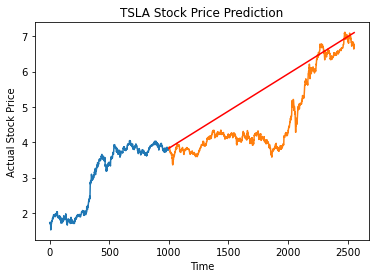

In [34]:
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(predictions, label='Prediction', color ="r")  # the prediction line is shown by the red line
plt.title('TSLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')

In [30]:
#Calculating error
rms = np.sqrt(mean_squared_error(test_log,predictions))
print("RMSE : ", rms)

RMSE :  0.9261868438225745


# SENTIMENTAL ANALYSIS

In [35]:
cols = ['Date','Category','News']
df_news = pd.read_csv('india-news-headlines.csv', names = cols)
df_news

,Date,Category,News
0,03-01-2012,unknown,Status quo will not be disturbed at Ayodhya; s...
1,04-01-2012,unknown,Fissures in Hurriyat over Pak visit
2,05-01-2012,unknown,America's unwanted heading for India?
3,06-01-2012,unknown,For bigwigs; it is destination Goa
4,09-01-2012,unknown,Extra buses to clear tourist traffic
...,...,...,...
2551,22-02-2022,unknown,Konkan Rly special trains between April and July
2552,23-02-2022,unknown,Goa plans courts on economic offences
2553,24-02-2022,unknown,Companies grab govt land; Opposition protests
2554,25-02-2022,unknown,TMC resolution demands ouster of Chidambaram


In [36]:
df_news.drop(0, inplace=True)
df_news.drop('Category', axis = 1, inplace=True)
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2555 entries, 1 to 2555
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2555 non-null   object
 1   News    2555 non-null   object
dtypes: object(2)
memory usage: 59.9+ KB


In [38]:
df_news.head(20)

,Date,News
1,04-01-2012,Fissures in Hurriyat over Pak visit
2,05-01-2012,America's unwanted heading for India?
3,06-01-2012,For bigwigs; it is destination Goa
4,09-01-2012,Extra buses to clear tourist traffic
5,10-01-2012,Dilute the power of transfers; says Riberio
6,11-01-2012,Focus shifts to teaching of Hindi
7,12-01-2012,IT will become compulsory in schools
8,13-01-2012,Move to stop freedom fighters' pension flayed
9,17-01-2012,Gilani claims he applied for passport 2 years ago
10,18-01-2012,Parivar dismisses PM's warning


In [39]:
#Grouping the headlines for each day
df_news['News'] = df_news.groupby(['Date']).transform(lambda x : ' '.join(x)) 
df_news = df_news.drop_duplicates() 
df_news.reset_index(inplace = True, drop = True)
df_news

,Date,News
0,04-01-2012,Fissures in Hurriyat over Pak visit
1,05-01-2012,America's unwanted heading for India?
2,06-01-2012,For bigwigs; it is destination Goa
3,09-01-2012,Extra buses to clear tourist traffic
4,10-01-2012,Dilute the power of transfers; says Riberio
...,...,...
2550,22-02-2022,Konkan Rly special trains between April and July
2551,23-02-2022,Goa plans courts on economic offences
2552,24-02-2022,Companies grab govt land; Opposition protests
2553,25-02-2022,TMC resolution demands ouster of Chidambaram


In [40]:
# After the grouping the News by Date 
df_news["News"][0]

'Fissures in Hurriyat over Pak visit'

Building functioin for getting the **subjectivity** and **Polarity**

In [41]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [42]:
#Adding subjectivity and polarity columns
df_news['Subjectivity'] = df_news['News'].apply(getSubjectivity)
df_news['Polarity'] = df_news['News'].apply(getPolarity)
df_news

,Date,News,Subjectivity,Polarity
0,04-01-2012,Fissures in Hurriyat over Pak visit,0.000000,0.000000
1,05-01-2012,America's unwanted heading for India?,0.000000,0.000000
2,06-01-2012,For bigwigs; it is destination Goa,0.000000,0.000000
3,09-01-2012,Extra buses to clear tourist traffic,0.241667,0.050000
4,10-01-2012,Dilute the power of transfers; says Riberio,0.000000,0.000000
...,...,...,...,...
2550,22-02-2022,Konkan Rly special trains between April and July,0.571429,0.357143
2551,23-02-2022,Goa plans courts on economic offences,0.200000,0.200000
2552,24-02-2022,Companies grab govt land; Opposition protests,0.000000,0.000000
2553,25-02-2022,TMC resolution demands ouster of Chidambaram,0.000000,0.000000


### Polarity

<AxesSubplot:>

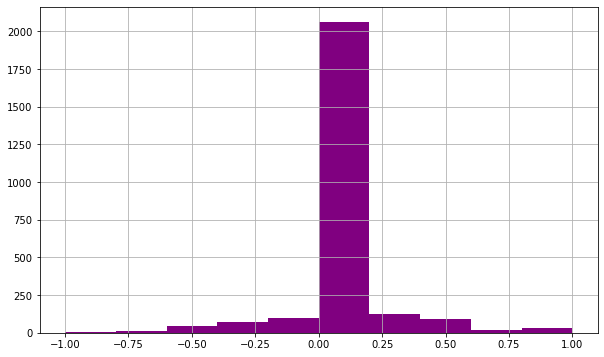

In [43]:
plt.figure(figsize = (10,6))
df_news['Polarity'].hist(color = 'purple')

### Subejctivity

<AxesSubplot:>

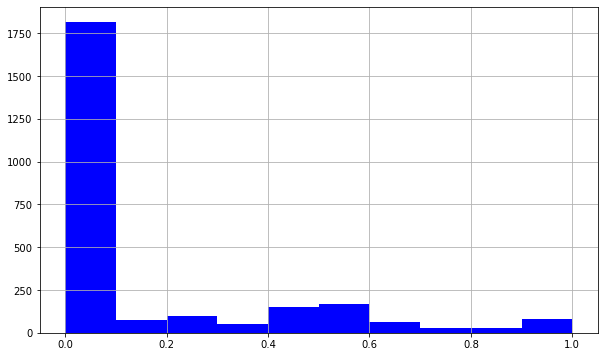

In [44]:
plt.figure(figsize = (10,6))
df_news['Subjectivity'].hist(color = 'blue')

In [45]:
#Adding sentiment score to df_news
sia = SentimentIntensityAnalyzer()

df_news['Compound'] = [sia.polarity_scores(v)['compound'] for v in df_news['News']]
df_news['Negative'] = [sia.polarity_scores(v)['neg'] for v in df_news['News']]
df_news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in df_news['News']]
df_news['Positive'] = [sia.polarity_scores(v)['pos'] for v in df_news['News']]
df_news

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,04-01-2012,Fissures in Hurriyat over Pak visit,0.000000,0.000000,0.0000,0.000,1.000,0.000
1,05-01-2012,America's unwanted heading for India?,0.000000,0.000000,-0.2263,0.322,0.678,0.000
2,06-01-2012,For bigwigs; it is destination Goa,0.000000,0.000000,0.0000,0.000,1.000,0.000
3,09-01-2012,Extra buses to clear tourist traffic,0.241667,0.050000,0.3818,0.000,0.658,0.342
4,10-01-2012,Dilute the power of transfers; says Riberio,0.000000,0.000000,0.0000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...
2550,22-02-2022,Konkan Rly special trains between April and July,0.571429,0.357143,0.4019,0.000,0.722,0.278
2551,23-02-2022,Goa plans courts on economic offences,0.200000,0.200000,-0.3400,0.324,0.676,0.000
2552,24-02-2022,Companies grab govt land; Opposition protests,0.000000,0.000000,-0.2263,0.275,0.725,0.000
2553,25-02-2022,TMC resolution demands ouster of Chidambaram,0.000000,0.000000,0.0000,0.000,1.000,0.000


In [46]:
df_prices

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-03-01,5.788000,5.900000,5.530000,5.616000,5.616000,4640500
1,2012-04-01,5.642000,5.734000,5.500000,5.542000,5.542000,3150500
2,2012-05-01,5.552000,5.586000,5.370000,5.424000,5.424000,5027500
3,2012-06-01,5.440000,5.558000,5.282000,5.382000,5.382000,4931500
4,2012-09-01,5.400000,5.498000,5.224000,5.450000,5.450000,4485000
...,...,...,...,...,...,...,...
2551,2022-02-22,834.130005,856.729980,801.099976,821.530029,821.530029,27762700
2552,2022-02-23,830.429993,835.299988,760.559998,764.039978,764.039978,31752300
2553,2022-02-24,700.390015,802.479980,700.000000,800.770020,800.770020,45107400
2554,2022-02-25,809.229980,819.500000,782.400024,809.869995,809.869995,25355900


In [47]:
df_news

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,04-01-2012,Fissures in Hurriyat over Pak visit,0.000000,0.000000,0.0000,0.000,1.000,0.000
1,05-01-2012,America's unwanted heading for India?,0.000000,0.000000,-0.2263,0.322,0.678,0.000
2,06-01-2012,For bigwigs; it is destination Goa,0.000000,0.000000,0.0000,0.000,1.000,0.000
3,09-01-2012,Extra buses to clear tourist traffic,0.241667,0.050000,0.3818,0.000,0.658,0.342
4,10-01-2012,Dilute the power of transfers; says Riberio,0.000000,0.000000,0.0000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...
2550,22-02-2022,Konkan Rly special trains between April and July,0.571429,0.357143,0.4019,0.000,0.722,0.278
2551,23-02-2022,Goa plans courts on economic offences,0.200000,0.200000,-0.3400,0.324,0.676,0.000
2552,24-02-2022,Companies grab govt land; Opposition protests,0.000000,0.000000,-0.2263,0.275,0.725,0.000
2553,25-02-2022,TMC resolution demands ouster of Chidambaram,0.000000,0.000000,0.0000,0.000,1.000,0.000


In [48]:
df_news["Close"]= df_prices["Close"]

In [49]:
df_news

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,Close
0,04-01-2012,Fissures in Hurriyat over Pak visit,0.000000,0.000000,0.0000,0.000,1.000,0.000,5.616000
1,05-01-2012,America's unwanted heading for India?,0.000000,0.000000,-0.2263,0.322,0.678,0.000,5.542000
2,06-01-2012,For bigwigs; it is destination Goa,0.000000,0.000000,0.0000,0.000,1.000,0.000,5.424000
3,09-01-2012,Extra buses to clear tourist traffic,0.241667,0.050000,0.3818,0.000,0.658,0.342,5.382000
4,10-01-2012,Dilute the power of transfers; says Riberio,0.000000,0.000000,0.0000,0.000,1.000,0.000,5.450000
...,...,...,...,...,...,...,...,...,...
2550,22-02-2022,Konkan Rly special trains between April and July,0.571429,0.357143,0.4019,0.000,0.722,0.278,856.979980
2551,23-02-2022,Goa plans courts on economic offences,0.200000,0.200000,-0.3400,0.324,0.676,0.000,821.530029
2552,24-02-2022,Companies grab govt land; Opposition protests,0.000000,0.000000,-0.2263,0.275,0.725,0.000,764.039978
2553,25-02-2022,TMC resolution demands ouster of Chidambaram,0.000000,0.000000,0.0000,0.000,1.000,0.000,800.770020


In [50]:
df = df_news[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]

In [51]:
df

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,5.616000,0.000000,0.000000,0.0000,0.000,1.000,0.000
1,5.542000,0.000000,0.000000,-0.2263,0.322,0.678,0.000
2,5.424000,0.000000,0.000000,0.0000,0.000,1.000,0.000
3,5.382000,0.241667,0.050000,0.3818,0.000,0.658,0.342
4,5.450000,0.000000,0.000000,0.0000,0.000,1.000,0.000
...,...,...,...,...,...,...,...
2550,856.979980,0.571429,0.357143,0.4019,0.000,0.722,0.278
2551,821.530029,0.200000,0.200000,-0.3400,0.324,0.676,0.000
2552,764.039978,0.000000,0.000000,-0.2263,0.275,0.725,0.000
2553,800.770020,0.000000,0.000000,0.0000,0.000,1.000,0.000


In [52]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(df))
new_df.columns = df.columns
new_df.index = df.index
new_df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.000863,0.000000,0.500,0.511478,0.000000,1.000,0.000
1,0.000803,0.000000,0.500,0.382252,0.356589,0.678,0.000
2,0.000707,0.000000,0.500,0.511478,0.000000,1.000,0.000
3,0.000672,0.241667,0.525,0.729500,0.000000,0.658,0.342
4,0.000728,0.000000,0.500,0.511478,0.000000,1.000,0.000


In [53]:
X = new_df.drop('Close', axis=1)  # independent variable
y =new_df['Close']  # dependent Variable

In [54]:
X

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.000000,0.500000,0.511478,0.000000,1.000,0.000
1,0.000000,0.500000,0.382252,0.356589,0.678,0.000
2,0.000000,0.500000,0.511478,0.000000,1.000,0.000
3,0.241667,0.525000,0.729500,0.000000,0.658,0.342
4,0.000000,0.500000,0.511478,0.000000,1.000,0.000
...,...,...,...,...,...,...
2550,0.571429,0.678571,0.740978,0.000000,0.722,0.278
2551,0.200000,0.600000,0.317325,0.358804,0.676,0.000
2552,0.000000,0.500000,0.382252,0.304540,0.725,0.000
2553,0.000000,0.500000,0.511478,0.000000,1.000,0.000


In [55]:
y

0       0.000863
1       0.000803
2       0.000707
3       0.000672
4       0.000728
          ...   
2550    0.695655
2551    0.666724
2552    0.619807
2553    0.649782
2554    0.657209
Name: Close, Length: 2555, dtype: float64

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
x_train.shape

(2044, 6)

In [57]:
x_train[:10]

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
1119,0.000000,0.500000,0.511478,0.000000,1.000,0.000
1097,0.000000,0.500000,0.511478,0.000000,1.000,0.000
1000,0.000000,0.500000,0.511478,0.000000,1.000,0.000
1539,0.000000,0.500000,0.717736,0.000000,0.737,0.263
723,0.600000,0.750000,0.729500,0.326689,0.227,0.477
2353,0.000000,0.500000,0.511478,0.000000,1.000,0.000
52,0.666667,0.666667,0.853757,0.000000,0.562,0.438
1935,0.300000,1.000000,0.969450,0.000000,0.493,0.507
1914,0.000000,0.500000,0.511478,0.000000,1.000,0.000
958,0.000000,0.500000,0.154637,0.744186,0.328,0.000


## Random Forest Classifier 

In [58]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

In [59]:
print(prediction[:10])
print("*****************")
print(y_test[:10])
print("*****************")
print("Mean Squared Error is ",mean_squared_error(prediction,y_test))

[0.12237403 0.38996146 0.17575961 0.05743219 0.12237403 0.12237403
 0.03654702 0.04338974 0.11324598 0.12237403]
*****************
2211    0.362608
2311    0.567218
1766    0.052586
1231    0.027483
621     0.034229
224     0.001524
2252    0.518440
1211    0.029306
997     0.033896
438     0.027781
Name: Close, dtype: float64
*****************
Mean Squared Error is  0.047083779493327


# AdaBoostRegressor

In [60]:
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)
predictions = adb.predict(x_test)

In [61]:
print(mean_squared_error(predictions, y_test))

0.05068375155570582


In [62]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()
dec_tree.fit(x_train, y_train)
predictions = dec_tree.predict(x_test)

In [63]:
print(predictions[:10])
print("*****************")
print(y_test[:10])
print("*****************")
print(mean_squared_error(predictions,y_test))

[0.12417446 0.54952533 0.03708975 0.05736285 0.12417446 0.12417446
 0.03821922 0.02676945 0.04997584 0.12417446]
*****************
2211    0.362608
2311    0.567218
1766    0.052586
1231    0.027483
621     0.034229
224     0.001524
2252    0.518440
1211    0.029306
997     0.033896
438     0.027781
Name: Close, dtype: float64
*****************
0.056403144730789244


# LGBMRegressor

In [64]:
lgb = lightgbm.LGBMRegressor()
lgb.fit(x_train, y_train)

LGBMRegressor()

In [65]:
predictions = lgb.predict(x_test)
print(mean_squared_error(predictions,y_test))

0.04677440383080473


# xgboost

In [66]:
xgb = xgboost.XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [67]:
predictions = xgb.predict(x_test)
print(mean_squared_error(predictions,y_test))

0.05026094334908537


#### **Hence, we conclude the LGBMRegressor performed the best with minimum mean squared error of 0.04677440383080473.**